In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

snacks_df = pd.read_csv('./datasets/clean_snacks.csv', dtype={ 'client_id': str }, parse_dates=['date'], date_parser=dateparse)
snacks_df.head()

,country_region,office_department_city,description,warehouse_city,category_name,brand_id,price_type,product_id,plant,client_id,flavor_name,client_name,point_of_sale_name,distributor,date,units,devolution_units,sale_amount,sale_discount,sale_devolution
0,Sur,Cali,TULUA,TULUA,Producto de Extrusion,M01,OFERTADO,53407164,P1,16359356,TRADICIONAL,NaN,NaN,Tiendas,2014-04-01,324,0,181530.0,-32675.40,0.0
1,Sur,Nariño,POPAYAN,POPAYAN,Producto de Extrusion,M01,OFERTADO,53407164,P1,16839877,TRADICIONAL,NaN,NaN,Tiendas,2014-04-01,36,0,20170.0,-4437.40,0.0
2,Sur,Nariño,POPAYAN,POPAYAN,Producto de Extrusion,M01,REGULAR,53102174,P1,16839877,TRADICIONAL,NaN,NaN,Tiendas,2014-04-01,73200,0,91227.0,-20069.98,0.0
3,Sur,Cali,AGUABLANCA - CALI,SUR,Producto de Extrusion,M01,OFERTADO,53408215,P1,94456173,TRADICIONAL,NaN,NaN,Tiendas,2014-04-01,1080,0,605100.0,-108918.43,0.0
4,Sur,Cali,AUTOSERVICIOS CALI,NORTE,Producto de Extrusion,M01,OFERTADO,53408024,P1,8050279707,TRADICIONAL,NaN,NaN,Superficies Menores,2014-04-01,100,40,73280.0,-10992.00,-29312.0


In [6]:
# ofert percentage
def calculate_percentage(row):
    if row['sale_amount'] == 0:
        return 0
    return row['sale_devolution'] / row['sale_amount'] * -1

snacks_df['percentage'] = snacks_df.apply(calculate_percentage, axis = 1)

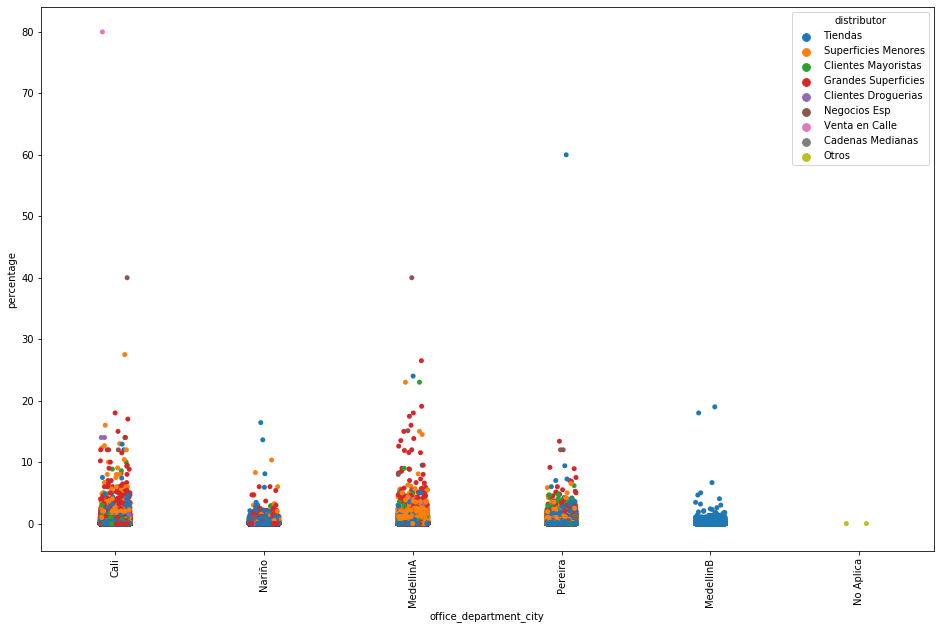

In [79]:
plt.figure(figsize=(16, 10))
ax = sns.stripplot(data=snacks_df, x='office_department_city', y='percentage', hue='distributor')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

**Como es el manejo de las ofertas en las diferentes oficinas y distribuidores? esta relacionado con la cantidad de ventas?**

Es interesante porque nos muestra como se distribuyen las ofertas entre las diferentes oficinas, nos indica que las oficinas que mas venden son las que mas descuento suelen hacer, y los mas grandes, se detecta que a las tiendas suele hacerse un descuento pequeño comparado con los descuentos que se le haen a superficies menores y grandes superficies, tambien se identico que una oficina en particular le vende solo a tiendas.

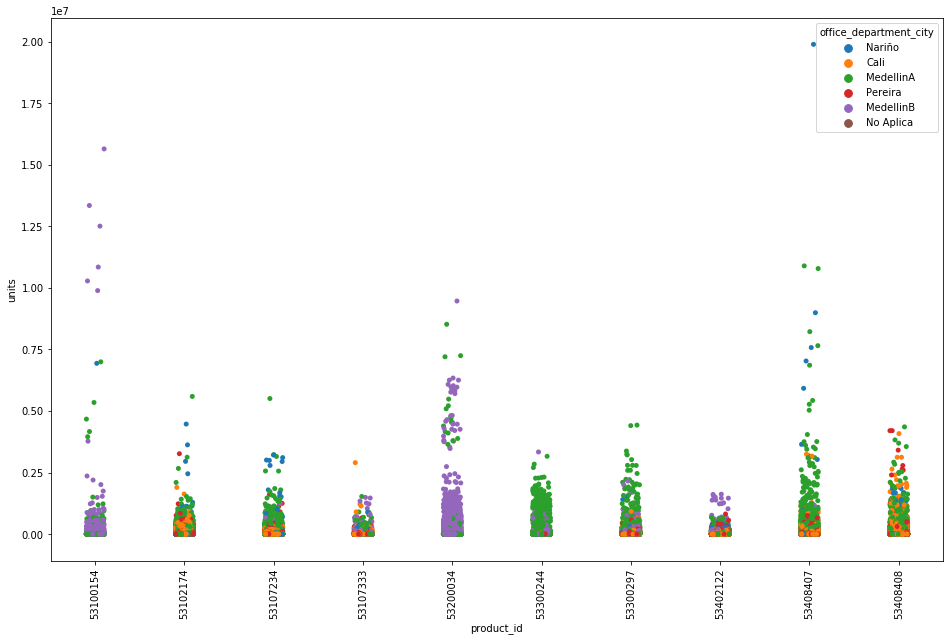

In [82]:
# 10 more saled products
products = snacks_df.groupby('product_id')['units'].sum().reset_index().sort_values('units', ascending=False).head(10)

plt.figure(figsize=(16, 10))
ax = sns.stripplot(data=snacks_df[snacks_df['product_id'].isin(products['product_id'])], x='product_id', y='units', hue='office_department_city')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Este gráfico es interesante para ver las ventas de los productos por oficina, podemos ver como unas oficinas tienen preferencia para algunos productos.

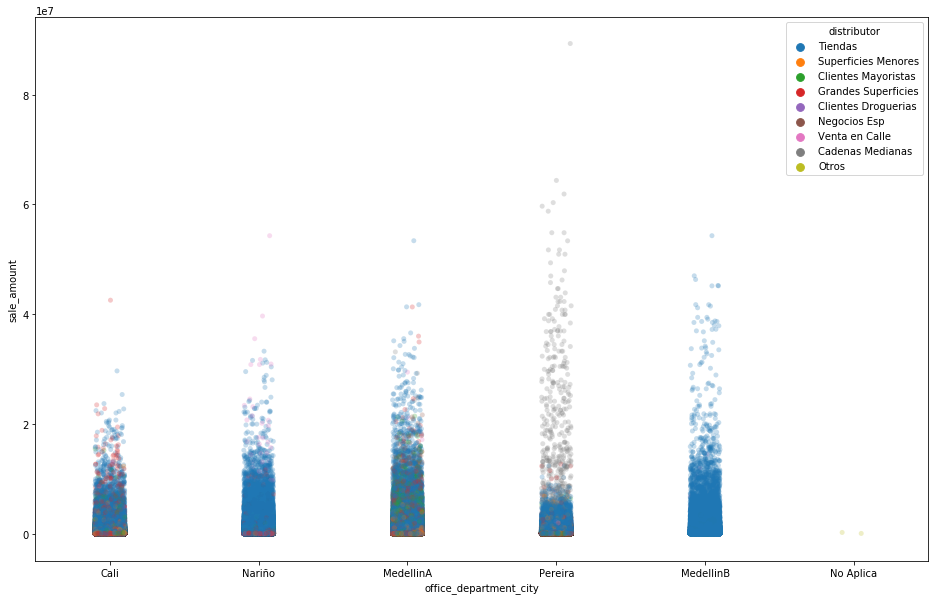

In [86]:
plt.figure(figsize=(16, 10))
sns.stripplot(data=snacks_df, x='office_department_city', y='sale_amount', hue='distributor', alpha=.25)

**Como se comportan las ventas de los diferentes distribuidores en las oficinas?**

Esta me parece muy buena porque muestra como las oficinas venden de acuerdo a los distribuidores y se puede observar como diferentes distribuidores tienen diferentes distribuciones de compra.

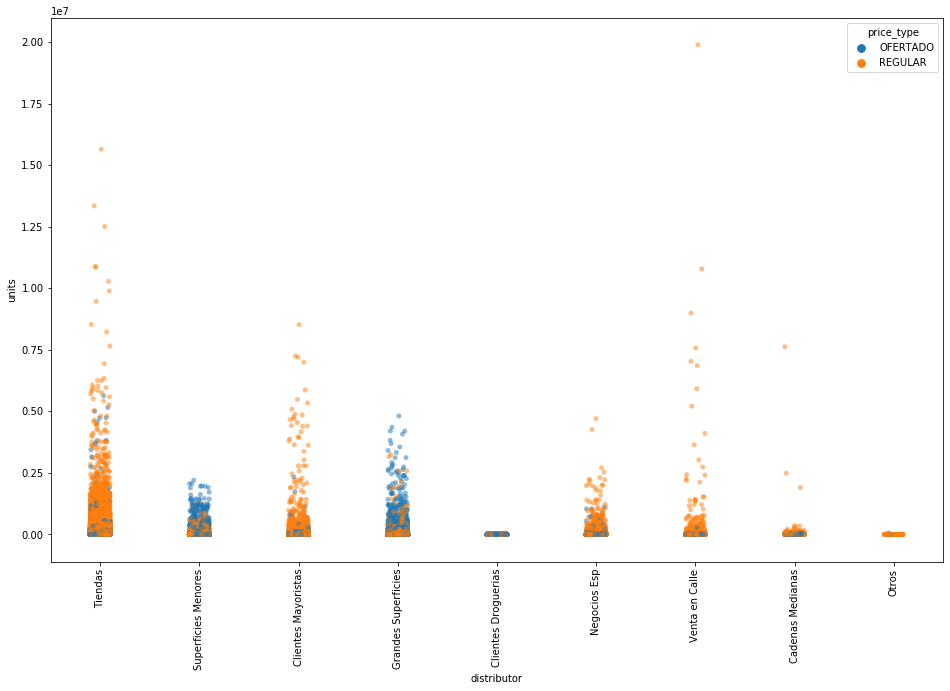

In [59]:
plt.figure(figsize=(16, 10))
ax = sns.stripplot(data=snacks_df, x='distributor', y='units', hue='price_type', alpha=.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

**TODO: Este puede ser un grafico que tenga mas sentido como un stacked...**

**Los productos de tipo ofertado mejora las ventas?**

Se puede analizar en este grafico que hay una relacion entre los productos ofertados y los distribuidores de superficies menores con grandes superficies, al parecer la distribución muestra que este tipo de distribuidor compra más productos ofertados, como si hubiera un tipo de negocio especial para este tipo de distribuidores.

Si lo comparamos con el char igual pero en vez de unidades se pone el sale, podemos corroborar que no implica para la empresa ventas mas altas, parece que las ventas se comportan muy parecido a las no ofertadas.

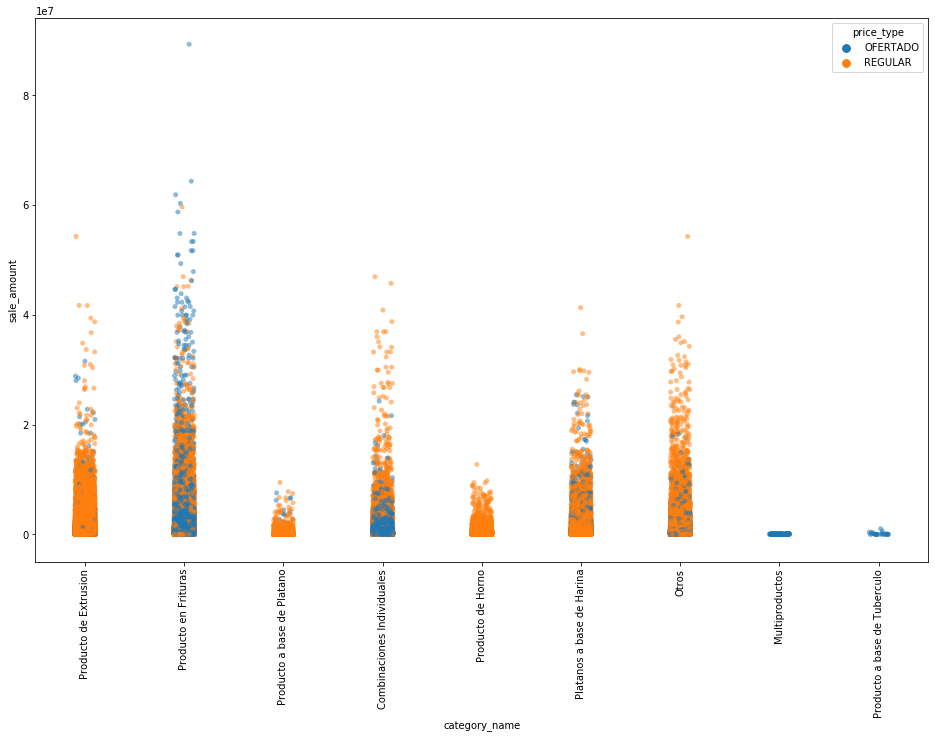

In [52]:
plt.figure(figsize=(16, 10))
ax = sns.stripplot(data=snacks_df, x='category_name', y='sale_amount', hue='prbice_type', alpha=.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [60]:
snacks_df.head()

,country_region,office_department_city,description,warehouse_city,category_name,brand_id,price_type,product_id,plant,client_id,...,client_name,point_of_sale_name,distributor,date,units,devolution_units,sale_amount,sale_discount,sale_devolution,percentage
0,Sur,Cali,TULUA,TULUA,Producto de Extrusion,M01,OFERTADO,53407164,P1,16359356,...,NaN,NaN,Tiendas,2014-04-01,324,0,181530.0,-32675.40,0.0,-0.0
1,Sur,Nariño,POPAYAN,POPAYAN,Producto de Extrusion,M01,OFERTADO,53407164,P1,16839877,...,NaN,NaN,Tiendas,2014-04-01,36,0,20170.0,-4437.40,0.0,-0.0
2,Sur,Nariño,POPAYAN,POPAYAN,Producto de Extrusion,M01,REGULAR,53102174,P1,16839877,...,NaN,NaN,Tiendas,2014-04-01,73200,0,91227.0,-20069.98,0.0,-0.0
3,Sur,Cali,AGUABLANCA - CALI,SUR,Producto de Extrusion,M01,OFERTADO,53408215,P1,94456173,...,NaN,NaN,Tiendas,2014-04-01,1080,0,605100.0,-108918.43,0.0,-0.0
4,Sur,Cali,AUTOSERVICIOS CALI,NORTE,Producto de Extrusion,M01,OFERTADO,53408024,P1,8050279707,...,NaN,NaN,Superficies Menores,2014-04-01,100,40,73280.0,-10992.00,-29312.0,0.4


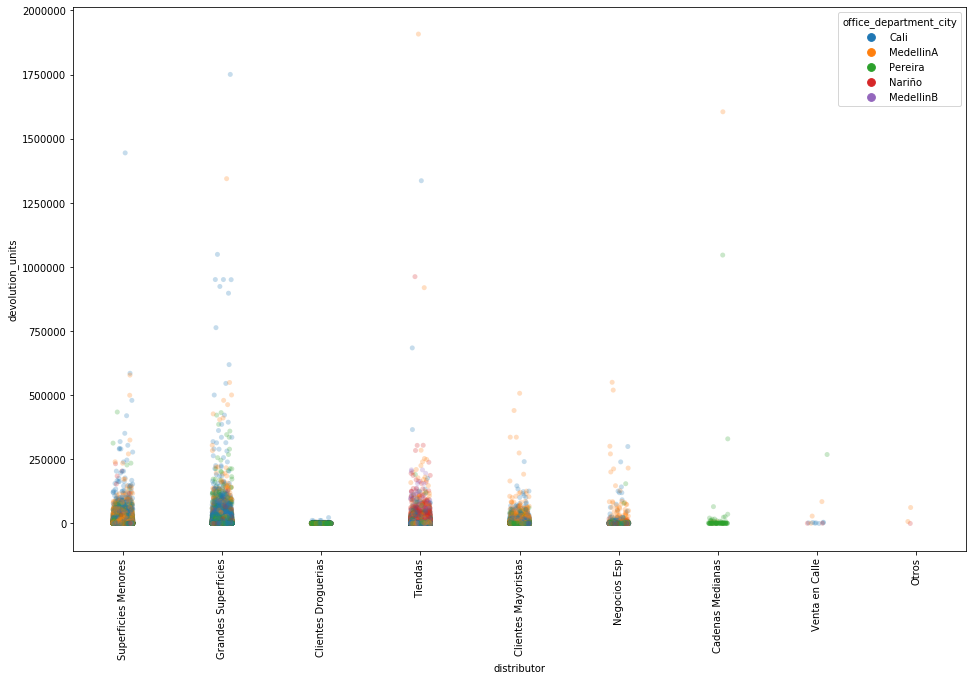

In [65]:
# devolutions
plt.figure(figsize=(16, 10))
ax = sns.stripplot(data=snacks_df[snacks_df['devolution_units'] > 0], x='distributor', y='devolution_units', hue='office_department_city', alpha=.25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

**TODO: Probar stacked bar para este tambien**
**Como los diferentes distribuidores se comportan en devoluciones de producto?**

Es interesante ver que las grandes superficies tienden a devolver mayores cantidades

In [73]:
snacks_df['client_name'] = snacks_df['client_name'].fillna('OTRO')

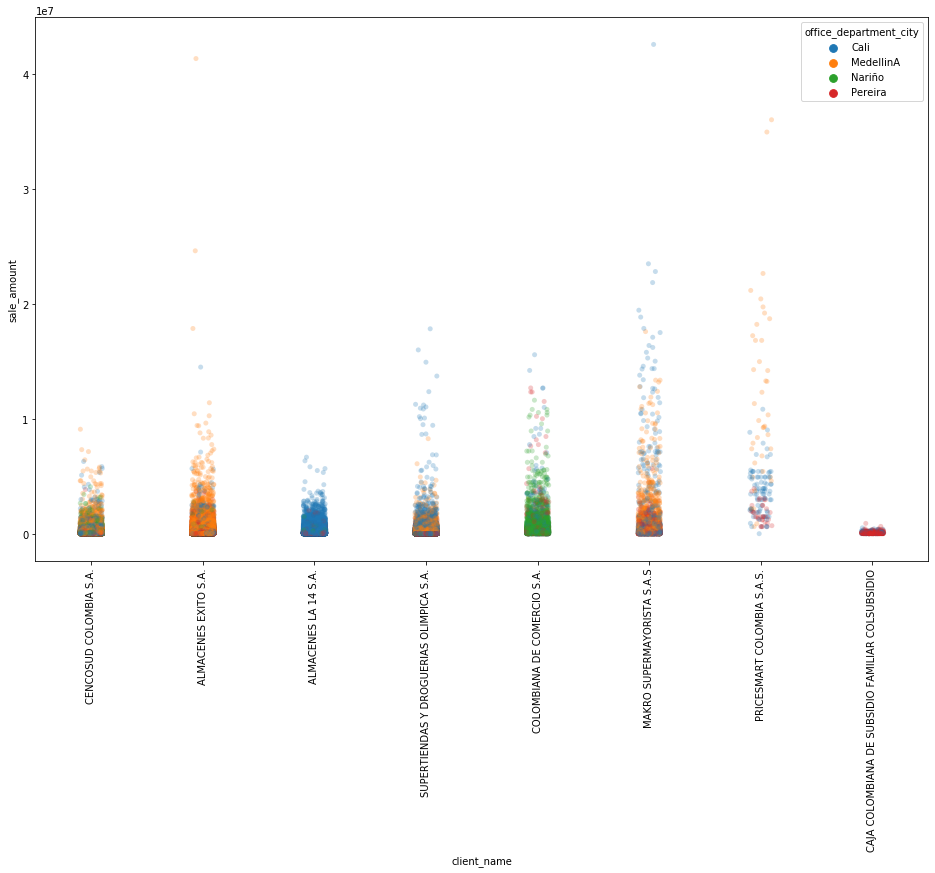

In [77]:
plt.figure(figsize=(16, 10))
ax = sns.stripplot(data=snacks_df[snacks_df['client_name'] != 'OTRO'], x='client_name', y='sale_amount', hue='office_department_city', alpha=.25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [43]:
# quiero agrupar por cliente y ver que hay en descripcion
g = snacks_df.groupby('client_name')['description'].agg(lambda x: set(x)).reset_index()

for row in g.iterrows():
    print(row[1][0])
    print(row[1][1])
    print('-----')

ALMACENES EXITO S.A.
{'INSTITUCIONAL PEREIRA', 'AUTOSERVICIOS NARIÑO', 'AUTOSERVICIOS PEREIRA', 'AUTOSERVICIOS CALI', 'AUTOSERVICIOS MEDELLIN', 'AUTOSERVICIOS'}
-----
ALMACENES LA 14 S.A.
{'INSTITUCIONAL PEREIRA', 'AUTOSERVICIOS NARIÑO', 'AUTOSERVICIOS CALI', 'AUTOSERVICIOS PEREIRA'}
-----
CAJA COLOMBIANA DE SUBSIDIO FAMILIAR COLSUBSIDIO
{'INSTITUCIONAL PEREIRA', 'AUTOSERVICIOS CALI'}
-----
CENCOSUD COLOMBIA S.A.
{'INSTITUCIONAL PEREIRA', 'AUTOSERVICIOS NARIÑO', 'AUTOSERVICIOS PEREIRA', 'AUTOSERVICIOS MEDELLIN', 'AUTOSERVICIOS CALI'}
-----
COLOMBIANA DE COMERCIO S.A.
{'INSTITUCIONAL PEREIRA', 'AUTOSERVICIOS NARIÑO', 'AUTOSERVICIOS PEREIRA', 'AUTOSERVICIOS MEDELLIN', 'AUTOSERVICIOS CALI', 'No Aplica'}
-----
MAKRO SUPERMAYORISTA S.A.S
{'AUTOSERVICIOS MEDELLIN', 'INSTITUCIONAL PEREIRA', 'AUTOSERVICIOS CALI', 'AUTOSERVICIOS PEREIRA'}
-----
PRICESMART COLOMBIA S.A.S.
{'AUTOSERVICIOS MEDELLIN', 'INSTITUCIONAL PEREIRA', 'AUTOSERVICIOS CALI'}
-----
SUPERTIENDAS Y DROGUERIAS OLIMPICA S.A.
{'INS

In [52]:
snacks_df[snacks_df['client_name'].isna() & snacks_df['description'].notnull()]['description'].unique()

array(['TULUA', 'POPAYAN', 'AGUABLANCA - CALI', 'AUTOSERVICIOS CALI',
       'BELLO ORIENTE - MEDELLIN', 'CENTRO', 'DOSQUEBRADAS', 'CHIPICHAPE',
       'MAYORISTAS MEDELLIN', 'BELLO OCCIDENTE - MEDELLIN', 'BELEN',
       'ARMENIA', 'CALI VIAJERA', 'PEREIRA', 'BUGA', 'VIAJEROS SUR ',
       'PASTO', 'MAYORISTAS PEREIRA', 'INSTITUCIONAL PEREIRA',
       'VIAJEROS NORTE ', 'DECEPAZ - CALI', 'IPIALES', 'LOCAL - PALMIRA',
       'AUTOSERVICIOS MEDELLIN', 'VIAJERA - PALMIRA', 'MANIZALES',
       'ITAGUI - MEDELLIN', 'No Aplica', 'ABURRA CENTRO',
       'VIAJEROS SUR MEKATO', 'MARIN ALZATE, LILIANA DEL SOCORRO',
       'INSTITUCIONAL NARIÑO', 'MAYORISTAS CALI', 'CHOCO',
       'INSTITUCIONAL CALI', 'INGENIO', 'CARTAGO', 'ABURRA SUR',
       'AUTOSERVICIOS', 'INSTITUCIONAL MEDELLIN', 'ABURRA ORIENTE',
       'PLAN VENTA AL PASO', 'MAYORISTA MEDELLIN', 'AUTOSERVICIOS NARIÑO',
       'ABURRA OCCIDENTE', 'VENTA AL PASO CALI', 'VIAJEROS NORTE MEKATO',
       'RODRIGUEZ BOTERO LUZ STELLA-SUPERVISOR

In [54]:
snacks_df[snacks_df['description'].isna()].isna().sum()

country_region                0
office_department_city        0
description               11212
warehouse_city                0
category_name               120
brand_id                      0
price_type                    0
product_id                    0
plant                         0
client_id                     0
flavor_name                   0
client_name               11212
point_of_sale_name        11212
distributor                   0
date                          0
units                         0
devolution_units              0
sale_amount                   0
sale_discount                 0
sale_devolution               0
dtype: int64

Todos los clientes tiene descripciones como las de arriba, eso que quiere decir?

In [36]:
snacks_df[snacks_df['warehouse_city'].isna()].isna().sum()

country_region                0
office_department_city        0
description                   0
warehouse_city            62769
category_name             61768
brand_id                      0
price_type                    0
product_id                    0
plant                         0
client_id                     0
flavor_name                   0
client_name               28098
point_of_sale_name        28098
distributor                   0
date                          0
units                         0
devolution_units              0
sale_amount                   0
sale_discount                 0
sale_devolution               0
dtype: int64

In [56]:
snacks_df[snacks_df['warehouse_city'].isna()]['description'].unique()

array(['AUTOSERVICIOS MEDELLIN', 'VENTA DIRECTA MEDELLIN',
       'AUTOSERVICIOS PEREIRA', 'MAYORISTAS MEDELLIN',
       'AUTOSERVICIOS NARIÑO', 'AUTOSERVICIOS CALI', 'VIAJEROS SUR ',
       'MAYORISTAS CALI', 'INSTITUCIONAL MEDELLIN', 'No Aplica',
       'INSTITUCIONAL CALI', 'INSTITUCIONAL PEREIRA',
       'VIAJEROS SUR MEKATO', 'MAYORISTA MEDELLIN',
       'BELLO ORIENTE - MEDELLIN', 'BELEN', 'BELLO OCCIDENTE - MEDELLIN',
       'ABURRA SUR', 'CENTRO', 'BELLO CENTRO', 'ABURRA OCCIDENTE',
       'ITAGUI - MEDELLIN', 'BONILLA MENESES, JHON JAIRO',
       'ABURRA ORIENTE', 'IPIALES', 'PASTO', 'CHOCO', 'VIAJEROS NORTE '],
      dtype=object)

In [41]:
snacks_df[snacks_df['category_name'].isna() & snacks_df['warehouse_city'].notnull()].isna().sum()

country_region                0
office_department_city        0
description                 120
warehouse_city                0
category_name             39662
brand_id                      0
price_type                    0
product_id                    0
plant                         0
client_id                     0
flavor_name                   0
client_name               29859
point_of_sale_name        29859
distributor                   0
date                          0
units                         0
devolution_units              0
sale_amount                   0
sale_discount                 0
sale_devolution               0
dtype: int64

In [83]:
g = snacks_df[snacks_df['category_name'].isna()].groupby('brand_id')['product_id'].aggregate(lambda x: set(x)).reset_index()

# products = list(g.iloc[0]['product_id'])
# snacks_df[snacks_df['product_id'].isin(products)]['category_name'].isna().sum()
g

,brand_id,product_id
0,Otras,"{53300244, 53300245, 53300246, 53300247, 53300..."


In [78]:
snacks_df[snacks_df['point_of_sale_name'].isna()]['description'].unique()

array(['TULUA', 'POPAYAN', 'AGUABLANCA - CALI', 'AUTOSERVICIOS CALI',
       'BELLO ORIENTE - MEDELLIN', 'CENTRO', 'DOSQUEBRADAS', 'CHIPICHAPE',
       'MAYORISTAS MEDELLIN', nan, 'BELLO OCCIDENTE - MEDELLIN', 'BELEN',
       'ARMENIA', 'CALI VIAJERA', 'PEREIRA', 'BUGA', 'VIAJEROS SUR ',
       'PASTO', 'MAYORISTAS PEREIRA', 'INSTITUCIONAL PEREIRA',
       'VIAJEROS NORTE ', 'DECEPAZ - CALI', 'IPIALES', 'LOCAL - PALMIRA',
       'AUTOSERVICIOS MEDELLIN', 'VIAJERA - PALMIRA', 'MANIZALES',
       'ITAGUI - MEDELLIN', 'No Aplica', 'ABURRA CENTRO',
       'VIAJEROS SUR MEKATO', 'MARIN ALZATE, LILIANA DEL SOCORRO',
       'INSTITUCIONAL NARIÑO', 'MAYORISTAS CALI', 'CHOCO',
       'INSTITUCIONAL CALI', 'INGENIO', 'CARTAGO', 'ABURRA SUR',
       'AUTOSERVICIOS', 'INSTITUCIONAL MEDELLIN', 'ABURRA ORIENTE',
       'PLAN VENTA AL PASO', 'MAYORISTA MEDELLIN', 'AUTOSERVICIOS NARIÑO',
       'ABURRA OCCIDENTE', 'VENTA AL PASO CALI', 'VIAJEROS NORTE MEKATO',
       'RODRIGUEZ BOTERO LUZ STELLA-SUPER

In [139]:
(
    snacks_df[snacks_df['description'].str.contains('MEDELLIN') | False]
    .groupby('warehouse_city')['date']
    .count().reset_index().sort_values('date')
)

,warehouse_city,date
0,BARRANQUILLA,8
1,ESPECIALES,8
2,NORTE,45213
3,SUR,217447


In [133]:
import numpy as np
np.nan

nan

In [128]:
snacks_df[snacks_df['client_name'].isna() & snacks_df['devolution_units'] > 0].shape

(1473, 20)

In [141]:
snacks_df[snacks_df['client_name'].isna()]['description'].unique()

array(['TULUA', 'POPAYAN', 'AGUABLANCA - CALI', 'AUTOSERVICIOS CALI',
       'BELLO ORIENTE - MEDELLIN', 'CENTRO', 'DOSQUEBRADAS', 'CHIPICHAPE',
       'MAYORISTAS MEDELLIN', nan, 'BELLO OCCIDENTE - MEDELLIN', 'BELEN',
       'ARMENIA', 'CALI VIAJERA', 'PEREIRA', 'BUGA', 'VIAJEROS SUR ',
       'PASTO', 'MAYORISTAS PEREIRA', 'INSTITUCIONAL PEREIRA',
       'VIAJEROS NORTE ', 'DECEPAZ - CALI', 'IPIALES', 'LOCAL - PALMIRA',
       'AUTOSERVICIOS MEDELLIN', 'VIAJERA - PALMIRA', 'MANIZALES',
       'ITAGUI - MEDELLIN', 'No Aplica', 'ABURRA CENTRO',
       'VIAJEROS SUR MEKATO', 'MARIN ALZATE, LILIANA DEL SOCORRO',
       'INSTITUCIONAL NARIÑO', 'MAYORISTAS CALI', 'CHOCO',
       'INSTITUCIONAL CALI', 'INGENIO', 'CARTAGO', 'ABURRA SUR',
       'AUTOSERVICIOS', 'INSTITUCIONAL MEDELLIN', 'ABURRA ORIENTE',
       'PLAN VENTA AL PASO', 'MAYORISTA MEDELLIN', 'AUTOSERVICIOS NARIÑO',
       'ABURRA OCCIDENTE', 'VENTA AL PASO CALI', 'VIAJEROS NORTE MEKATO',
       'RODRIGUEZ BOTERO LUZ STELLA-SUPER